In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/movies/movies.csv


# Import Libraries and Dataset

In [3]:
#Import Libraries 
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [4]:
#Read in data
df = pd.read_csv('../input/movies/movies.csv')

#View Data
#pd.set_option('display.max_rows', None) #Optional if you wish to view ALL rows
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


# Data Cleaning

In [5]:
#Check for missing values
df.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [6]:
df.shape

(7668, 15)

In [7]:
#Drop rows with missing data
cols = ['rating', 'released', 'score', 'votes', 'writer', 'star', 'country', 'budget', 'gross', 'company', 'runtime']

for col in cols:
    df.dropna(subset = [col], inplace=True)
df.reset_index()
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [8]:
df.shape

(5421, 15)

In [9]:
#Check data types for each column
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [10]:
#Convert Budget and Gross columns to intgers
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')

In [11]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [12]:
#Sort data by gross and view TOP 5 movies with highest gross earnings
df_top5 = df.sort_values(by=['gross'], inplace=False, ascending=False)
df_top5 = df_top5.head()
df_top5

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


# Find Correlations

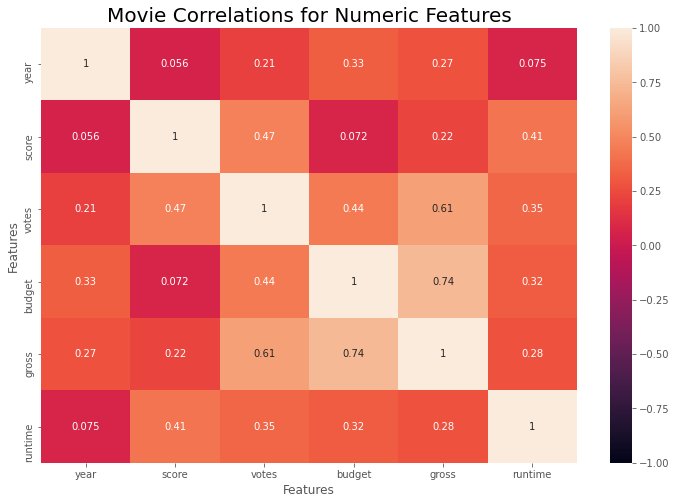

In [13]:
#Correlations of numeric features from our dataset
corr = df.corr()
sns.heatmap(corr, annot=True, vmin=-1)
plt.title('Movie Correlations for Numeric Features', size=20)
plt.xlabel('Features', size=12)
plt.ylabel('Features', size=12)
plt.show()

From our correlation heatmap we can see that budget and gross are most correlated, therefore, we can take a closer look by creating a scatter plot

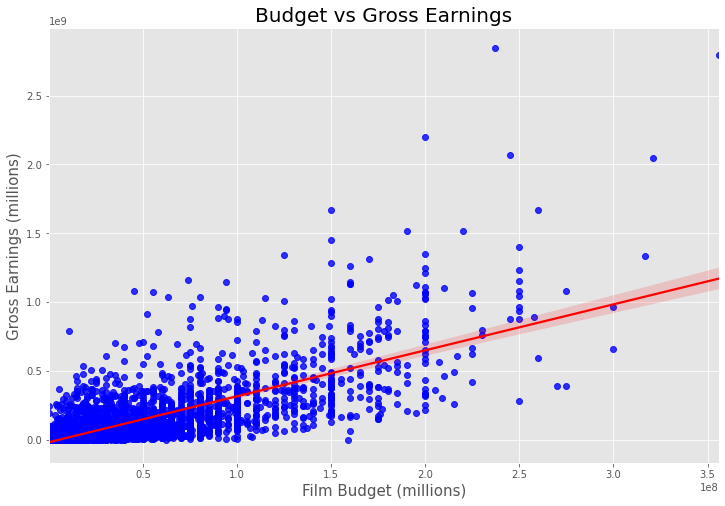

In [14]:
#Scatter Plot illustarting budget vs gross
sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
plt.title('Budget vs Gross Earnings', size=20)
plt.xlabel('Film Budget (millions)', size=15)
plt.ylabel('Gross Earnings (millions)', size=15)

plt.show()

From our scatter plot fitted with a regression line we can see that unsuprisnlgy, budget and gross earnings are positively correlated. However, these correlations only account for numeric features,therefore, we can convert categorical features (e.g. genre) into numeric values.

In [15]:
#Convert our categorical features into numerical values
df_n = df.copy()
for col in df_n.columns:
    if df_n[col].dtype == 'object':
        df_n[col] = df_n[col].astype('category').cat.codes
df_n.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4692,6,6,1980,1304,8.4,927000,1795,2832,699,46,19000000,46998772,1426,146.0
1,3929,6,1,1980,1127,5.8,65000,1578,1158,214,47,4500000,58853106,452,104.0
2,3641,4,0,1980,1359,8.7,1200000,757,1818,1157,47,18000000,538375067,945,124.0
3,204,4,4,1980,1127,7.7,221000,889,1413,1474,47,3500000,83453539,1108,88.0
4,732,6,4,1980,1170,7.3,108000,719,351,271,47,6000000,39846344,1083,98.0


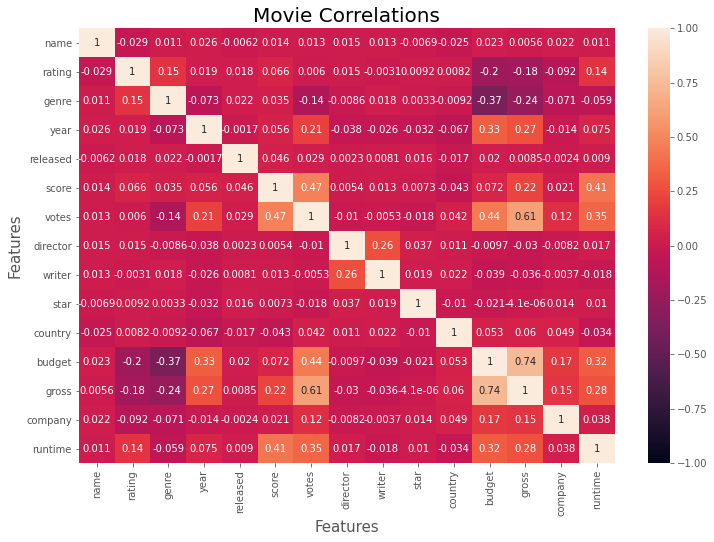

In [16]:
#Create correlation matrix with all features
full_corr = df_n.corr()
sns.heatmap(full_corr, annot=True, vmin=-1)
plt.title('Movie Correlations', size=20)
plt.xlabel('Features', size=15)
plt.ylabel('Features', size=15)
plt.show()

In [17]:
corr_pairs = full_corr.unstack()       #View correlation matrix of a single feature with each feature category
sorted_corr = corr_pairs.sort_values() #Sort correlation martix by correlation pairs (e.g. gross & company, gross & budget)
sorted_corr

budget   genre     -0.368523
genre    budget    -0.368523
         gross     -0.244101
gross    genre     -0.244101
budget   rating    -0.203946
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64

In [18]:
high_corr = sorted_corr[sorted_corr>0.5]                 #Check for correlations greater than 0.5
high_corr[0:4].sort_values(ascending=False)              #return values where correlation is not 1.0

gross   budget    0.740247
budget  gross     0.740247
votes   gross     0.614751
gross   votes     0.614751
dtype: float64

From our new correlation matrix we can see that despite the inclusion of non-numeric features (e.g. company, genre, etc.) budget and gross earning features are still the MOST correlated. However, we also see that votes and gross show a high correlation as well. This is understandable as movies with high gross earnings would most likley have much more voters then unpopular movies.

# EDA and Visualizations

### Top 5 Movies and Companies

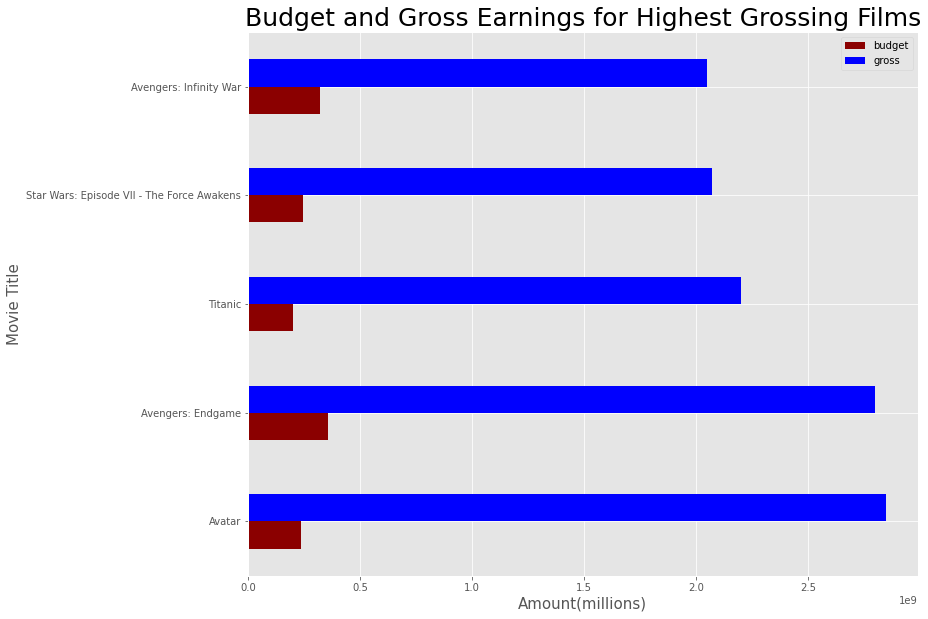

In [19]:
df_top5.plot(kind='barh', x='name', y=['budget','gross'], color={'budget':'darkred', 'gross':'blue'}, figsize=(12,10))
plt.title('Budget and Gross Earnings for Highest Grossing Films', size=25)
plt.xlabel('Amount(millions)', size=15)
plt.ylabel('Movie Title', size=15)
plt.show()


In [20]:
companies = df.groupby(['company'], as_index=False)['budget', 'gross'].sum().sort_values(by='gross', ascending=False)
top5_companies = companies.head()
top5_companies

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,company,budget,gross
1426,Warner Bros.,19503300000,54610959970
1397,Universal Pictures,15989730001,51241105418
452,Columbia Pictures,15512107000,42356430218
1108,Paramount Pictures,13723450000,40021704691
1382,Twentieth Century Fox,11474600000,39542573303


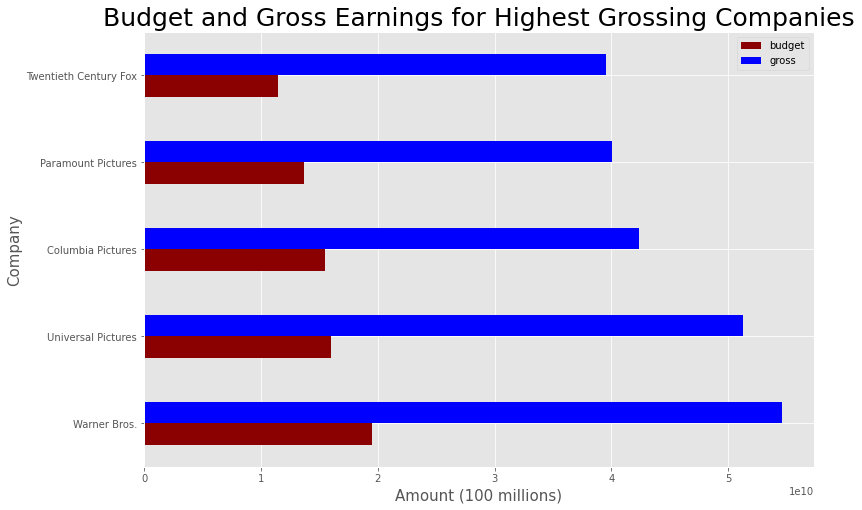

In [21]:
top5_companies.plot(kind='barh', x='company', y=['budget', 'gross'],color={'budget':'darkred', 'gross':'blue'}, figsize=(12,8))
plt.title('Budget and Gross Earnings for Highest Grossing Companies', size=25)
plt.xlabel('Amount (100 millions)', size=15)
plt.ylabel('Company', size=15)
plt.show()

## Genre vs Gross

In [22]:
genre_gross = df.groupby(['genre'], as_index=False)['gross'].sum().sort_values(by='gross', ascending=False)
genre_gross.reset_index()
genre_gross

,genre,gross
0,Action,237752868767
4,Comedy,88514817620
2,Animation,77865909110
6,Drama,52098564769
1,Adventure,43578711908
5,Crime,20017662162
3,Biography,19093930296
9,Horror,14261055032
7,Family,2074332587
10,Mystery,2004091467


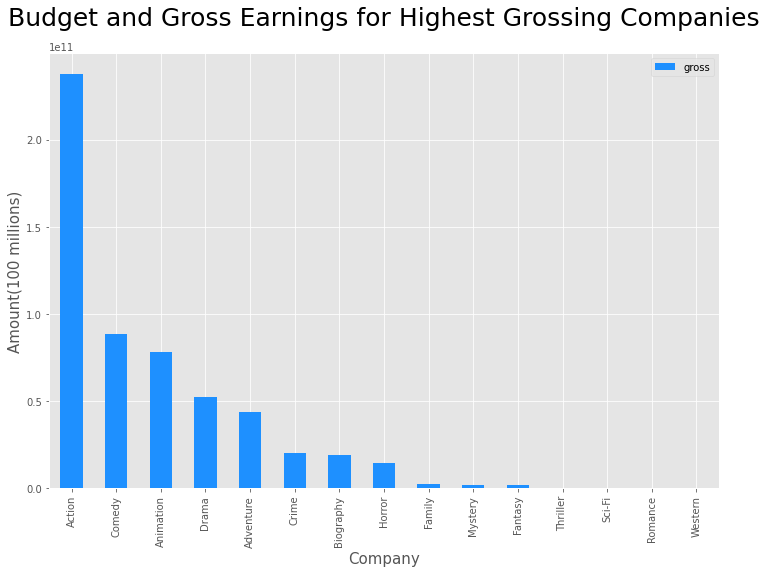

In [23]:
genre_gross.plot(kind='bar', x='genre', y='gross', color='dodgerblue', figsize=(12,8))
plt.title('Budget and Gross Earnings for Highest Grossing Companies', size=25, y=1.05)
plt.xlabel('Company', size=15)
plt.ylabel('Amount(100 millions)', size=15)
plt.show()

## Top Writers and Stars

In [24]:
writers = df.groupby(['writer'], as_index=False)['name'].count().sort_values(by='name', ascending=False)
writers.rename(columns={'name':'movies'}, inplace=True)
top_writers = writers.head(10)
top_writers

,writer,movies
3184,Woody Allen,32
2832,Stephen King,29
1513,John Hughes,20
1879,Luc Besson,14
1456,Joel Coen,13
3124,Wes Craven,12
1898,M. Night Shyamalan,11
2601,Robert Rodriguez,11
706,David Mamet,11
2447,Quentin Tarantino,11


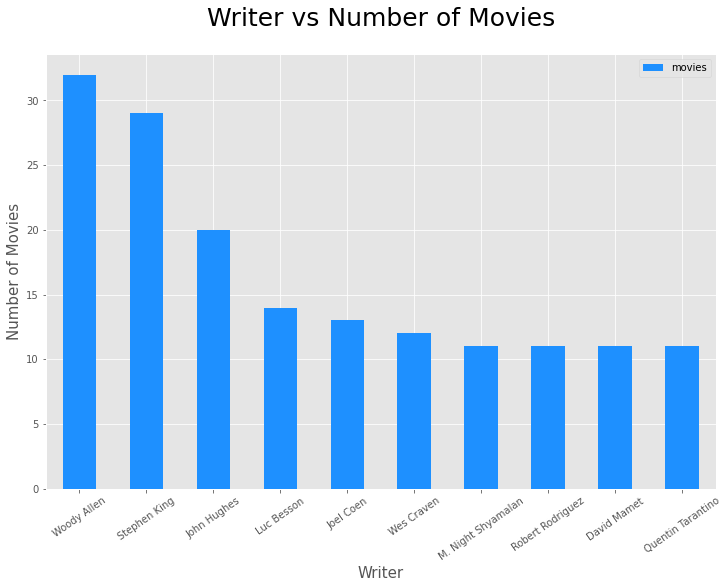

In [25]:
top_writers.plot(kind='bar', x='writer', y='movies', color='dodgerblue', figsize=(12,8))
plt.title('Writer vs Number of Movies', size=25, y=1.05)
plt.xlabel('Writer', size=15)
plt.xticks(rotation=35)
plt.ylabel('Number of Movies', size=15)
plt.show()

In [26]:
stars = df.groupby(['star'], as_index=False)['name'].count().sort_values(by='name', ascending=False)
stars.rename(columns={'name':'movies'}, inplace=True)
top_stars = stars.head(11)
top_stars

,star,movies
1313,Nicolas Cage,40
1735,Tom Hanks,38
1469,Robert De Niro,38
220,Bruce Willis,34
1732,Tom Cruise,33
436,Denzel Washington,33
1665,Sylvester Stallone,32
889,Johnny Depp,31
13,Adam Sandler,28
1011,Kevin Costner,27


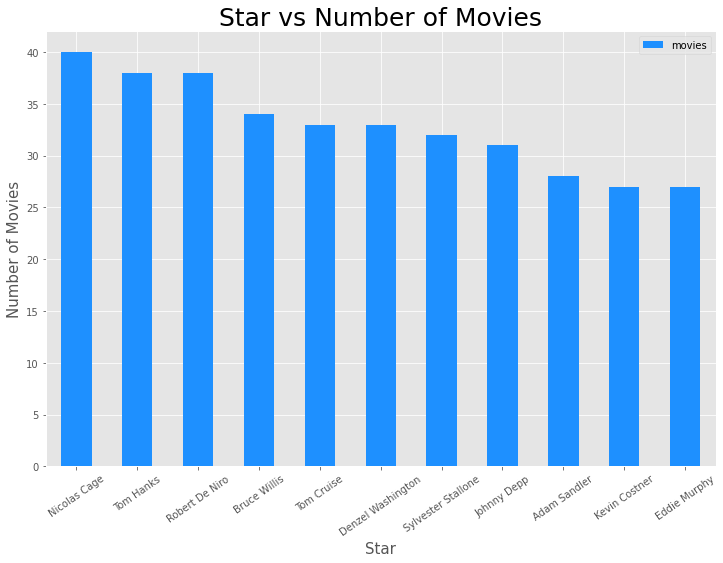

In [27]:
top_stars.plot(kind='bar', x='star', y='movies', color='dodgerblue', figsize=(12,8))
plt.title('Star vs Number of Movies', size=25)
plt.xlabel('Star', size=15)
plt.xticks(rotation=35)
plt.ylabel('Number of Movies', size=15)
plt.show()

## Highest Rated Films

In [28]:
df_scoring = df.sort_values(by='score', ascending=False)
top_rated = df_scoring[df_scoring['score']>8.6]
top_rated

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
2443,The Shawshank Redemption,R,Drama,1994,"October 14, 1994 (United States)",9.3,2400000,Frank Darabont,Stephen King,Tim Robbins,United States,25000000,28817291,Castle Rock Entertainment,142.0
5243,The Dark Knight,PG-13,Action,2008,"July 18, 2008 (United States)",9.0,2400000,Christopher Nolan,Jonathan Nolan,Christian Bale,United States,185000000,1005973645,Warner Bros.,152.0
2247,Schindler's List,R,Biography,1993,"February 4, 1994 (United States)",8.9,1200000,Steven Spielberg,Thomas Keneally,Liam Neeson,United States,22000000,322161245,Universal Pictures,195.0
2444,Pulp Fiction,R,Crime,1994,"October 14, 1994 (United States)",8.9,1900000,Quentin Tarantino,Quentin Tarantino,John Travolta,United States,8000000,213928762,Miramax,154.0
4245,The Lord of the Rings: The Return of the King,PG-13,Action,2003,"December 17, 2003 (United States)",8.9,1700000,Peter Jackson,J.R.R. Tolkien,Elijah Wood,New Zealand,94000000,1146030912,New Line Cinema,201.0
5643,Inception,PG-13,Action,2010,"July 16, 2010 (United States)",8.8,2100000,Christopher Nolan,Christopher Nolan,Leonardo DiCaprio,United States,160000000,836836967,Warner Bros.,148.0
2445,Forrest Gump,PG-13,Drama,1994,"July 6, 1994 (United States)",8.8,1900000,Robert Zemeckis,Winston Groom,Tom Hanks,United States,55000000,678226133,Paramount Pictures,142.0
3444,Fight Club,R,Drama,1999,"October 15, 1999 (United States)",8.8,1900000,David Fincher,Chuck Palahniuk,Brad Pitt,Germany,63000000,101209702,Fox 2000 Pictures,139.0
3845,The Lord of the Rings: The Fellowship of the Ring,PG-13,Action,2001,"December 19, 2001 (United States)",8.8,1700000,Peter Jackson,J.R.R. Tolkien,Elijah Wood,New Zealand,93000000,897690072,New Line Cinema,178.0
3443,The Matrix,R,Action,1999,"March 31, 1999 (United States)",8.7,1700000,Lana Wachowski,Lilly Wachowski,Keanu Reeves,United States,63000000,466364845,Warner Bros.,136.0


In [29]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.bar(top_rated, 
             x='name', 
             y='gross', 
             title='Gross Earnings for Highest Rated Movies', 
             text='score', 
             width=1100, 
             height=800)
fig.update_layout(xaxis_title='Movie Title', yaxis_title='Gross Earning', title_x = 0.45)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside', hovertext='score')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.update_traces(marker_color='lightskyblue', marker_line_color='darkblue')
fig.show()

#### Mini-note Inception & The Dark Knight Rises are actually my personal favourite!